## Multiple Linear Regression ... in its full potential
   
   
<center> 
<img src="https://images.unsplash.com/photo-1518365050014-70fe7232897f?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2827&q=80" width=300>
</center>    
    
Photo by <a href="https://unsplash.com/@billjelen?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Bill Jelen</a> on <a href="https://unsplash.com/photos/NVWyN8GamCk?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

## Last class

### Multiple Linear Regression (MLR)


**1. Categorical input variables with 2 or more levels**


**2. Additive MLR: with different type of input variables**

## Today

**3. MLR with interaction terms: interactions between continuous and categorical input variables**

**4. Additive MLR with any type of variables**

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(moderndive)
library(plotly)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [2]:
US_cancer_data <- read_csv("data/US_county_cancer_data.csv") %>%
  select(TARGET_deathRate, povertyPercent, PctPrivateCoverage, Geography)

Rows: 3047 Columns: 34
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): binnedInc, Geography
dbl (32): avgAnnCount, avgDeathsPerYear, TARGET_deathRate, incidenceRate, me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Let's continue using the `US_cancer_data` to introduce other concepts of MLR

In [3]:
US_cancer_data$state <- sapply(strsplit(US_cancer_data$Geography, ", "), "[", 2)  

In [4]:
head(US_cancer_data,3)

TARGET_deathRate,povertyPercent,PctPrivateCoverage,Geography,state
<dbl>,<dbl>,<dbl>,<chr>,<chr>
164.9,11.2,75.1,"Kitsap County, Washington",Washington
161.3,18.6,70.2,"Kittitas County, Washington",Washington
174.7,14.6,63.7,"Klickitat County, Washington",Washington


In [5]:
WI_cancer_data <- US_cancer_data %>%filter(state %in% c("Washington", "Indiana"))%>% 
                            droplevels()

WI_cancer_data$state <- as.factor(WI_cancer_data$state)

### Visualization

In [6]:
TARGET_deathRate_boxplots <- WI_cancer_data %>%
  ggplot() +
  geom_boxplot(aes(state, TARGET_deathRate, fill = state)) +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
#  ggtitle("Boxplots of Cancer Mortality by States") +
  xlab("State") +
  ylab("Cancer Mortality (cases/100,000)") +
  stat_summary(aes(state, TARGET_deathRate, fill = state),
    fun = mean, colour = "yellow", geom = "point",
    shape = 18, size = 5
  )

cancer_SLR_plot <- ggplot(WI_cancer_data, aes(
  y = TARGET_deathRate,
  x = povertyPercent
)) +
  geom_point() +
  geom_smooth(method="lm", linewidth = 1, fullrange=TRUE, se= FALSE) +
#  ggtitle("Simple Linear Regression")+
    xlab("Populace Poverty (%)") +
    ylab(NULL)+
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  ) 

cancer_MLR_add_plot <- ggplot(WI_cancer_data, aes(
  y = TARGET_deathRate,
  x = povertyPercent,
  color = state
)) +
  geom_point() +
  geom_parallel_slopes(fullrange=TRUE, se= FALSE)+
  #geom_smooth(method="lm", linewidth = 1, fullrange=TRUE, se= FALSE) +
 # ggtitle("Additive Multiple Linear Regression")+
    xlab("Populace Poverty (%)") +
    ylab("Cancer Mortality (cases/100,000)") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  ) +
  labs(color = "state")

cancer_MLR_int_plot <- ggplot(WI_cancer_data, aes(
  y = TARGET_deathRate,
  x = povertyPercent,
  color = state
)) +
  geom_point() +
  geom_smooth(method="lm", linewidth = 1, fullrange=TRUE, se= FALSE) +
#  ggtitle("Interaction Multiple Linear Regression")+
    xlab("Populace Poverty (%)") +
    ylab(NULL)+
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  ) +
  labs(color = "state")

In [7]:
# arrange all plots in a 2 rows
plot_all <- plot_grid(
  TARGET_deathRate_boxplots + theme(legend.position="none"),
  cancer_SLR_plot  + theme(legend.position="none"),
  cancer_MLR_add_plot + theme(legend.position="none"),
  cancer_MLR_int_plot + theme(legend.position="none"),
  align = 'vh',
  labels = c("A", "B", "C", "D"),
  hjust = -1,
  nrow = 2
)
# extract a legend 
legend_all <- get_legend(cancer_MLR_add_plot + 
    guides(color = guide_legend(nrow = 1)) +
    theme(legend.position = "bottom")
)

# add a common legend below the plots
plot_all <- plot_grid(plot_all, legend_all, ncol = 1, rel_heights = c(1, .1))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


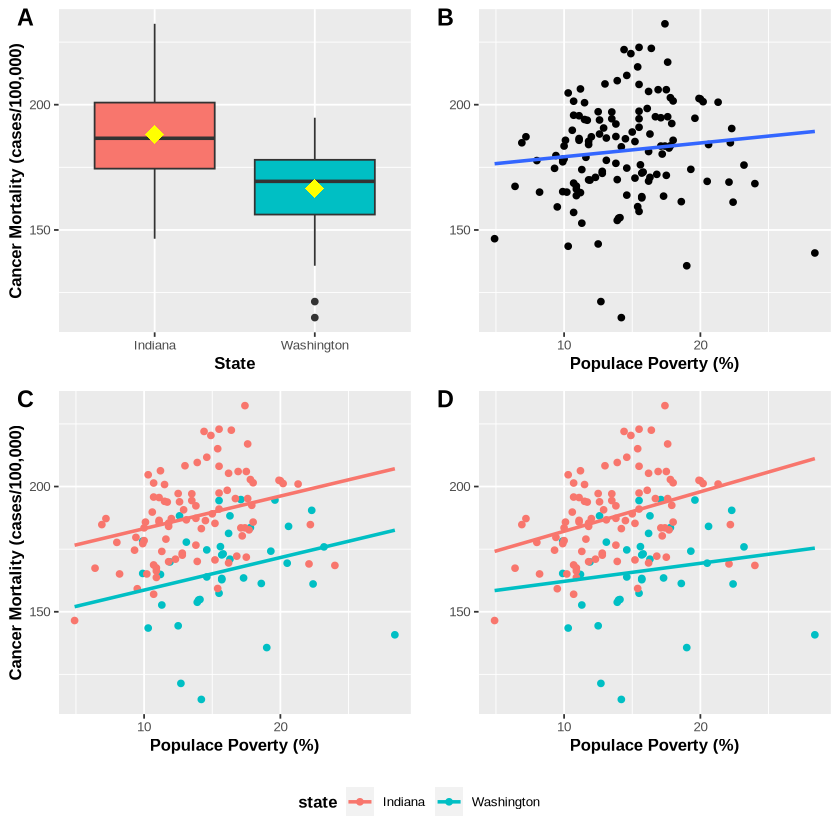

In [8]:
plot_all

## Interpretations

> class discussion

**A.** The average cancer mortality rate in Indiana is larger than that in Washington

**B.** We expect that cancer mortality rate rises with populace poverty percentage (on average for both states)

**C.** We expect that cancer mortality rate rises with populace poverty percentage *equally in both states*. However, *for any poverty percentage* we expect the mortality in Indiana to be higher than that in Washington.

**D.** We expect that cancer mortality rate rises with populace poverty percentage and this change is larger in Indiana. *equally in both states*. The expected difference in mortality between both states depends on the value of poverty percentage.

## 3. MLR: with interaction

How can we model the relation between poverty and mortality if we believe that the change in mortality per percentage change in poverty varies by states??

#### If the slope changes with the levels of the categorical variable, we need to add interaction term(s)

The regression equation becomes:

$$Y_i = \beta_0 + \beta_1 \text{stateWashington}_i + \beta_2 \text{povertyPercent}_i + \beta_3 \text{stateWashington}_i \times \text{povertyPercent}_i + \varepsilon_i,$$


Note that we can also think of this LR as 2 in one, with 2 lines:

- For counties in Indiana, `stateWashington =0`

$$Y_i = \beta_0 + \beta_1 \times 0 + \beta_2 \times \text{povertyPercent}_i  + \beta_3 \times 0 \times \text{povertyPercent}_i + \varepsilon_i$$

$$ Y_i= \beta_0 + \beta_2 \times \text{povertyPercent}_i + \varepsilon_i$$

This is a **regression line**!! It's Indiana's regression line!

- For counties in Washington, 

$$Y_i = \beta_0 + \beta_1 \times 1 + \beta_2 \times \text{povertyPercent}_i + \beta_3 \times 1 \times \text{povertyPercent}_i+ \varepsilon_i$$

$$ Y_i= (\beta_0 + \beta_1) + (\beta_2  + \beta_3) \times \text{povertyPercent}_i+\varepsilon_i$$

This is another **regression line**!! It's Washington's regression line!

Note that the intercept equals $\beta_0 + \beta_1$ and the slope equals $\beta_2 + \beta_3$

### Interpretation: 

- $\beta_0$ is intercept of the *reference* line. 


- $\beta_1$ (coefficient of the dummy variable) is the *difference* between intercepts of both lines.


- $\beta_2$ is the slope of the *reference* line. 


- $\beta_3$ is the the *difference* between slopes of both lines (aka *interaction* term)

**Important**: using data you **estimate** these quantities!! 

`geom_smooth()` using formula = 'y ~ x'


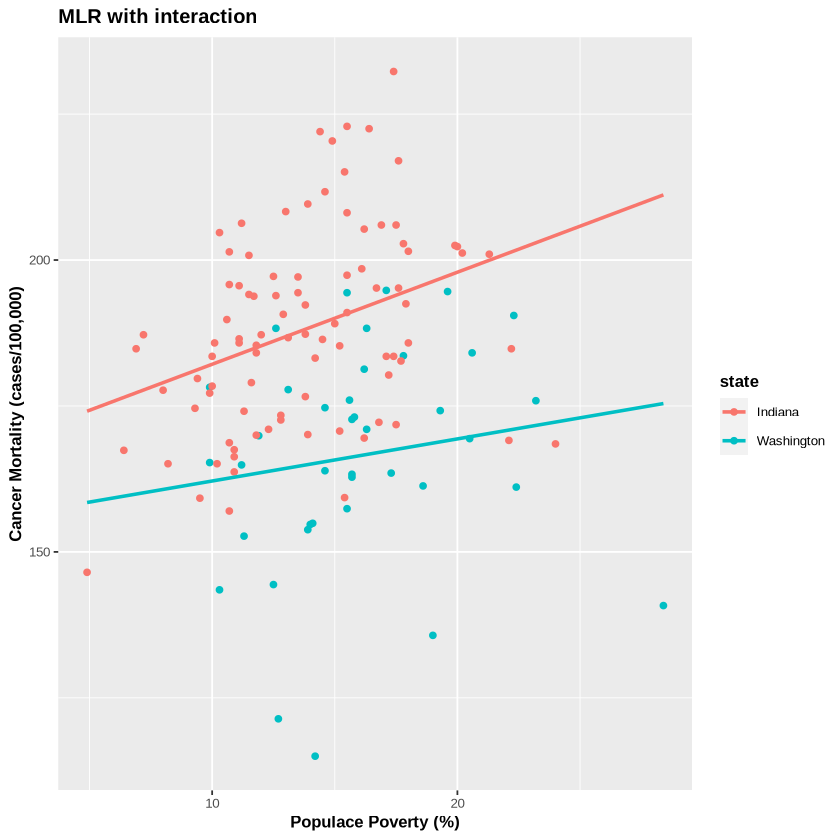

In [9]:
cancer_MLR_int_plot + ylab("Cancer Mortality (cases/100,000)") +
    ggtitle("MLR with interaction")

#### NOTE: there are now 4 coefficients for 2 lines because in the model with interactions we do *NOT* assume a common slope!!

Plot D illustrates this case

### Code

`MLR_stat_poverty_int <- lm(TARGET_deathRate ~ state * povertyPercent, data = WI_cancer_data)`

> variables are added to the model using `*`

In [10]:
MLR_state_poverty_int <- tidy(lm(TARGET_deathRate ~ state * povertyPercent,
                  data = WI_cancer_data)) %>% mutate_if(is.numeric, round, 3)

In [11]:
MLR_state_poverty_int 

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),166.379,6.768,24.584,0.000
stateWashington,-11.451,13.176,-0.869,0.386
povertyPercent,1.577,0.474,3.327,0.001
stateWashington:povertyPercent,-0.855,0.833,-1.027,0.306


## MLR in its full potential
    
<center> 
<img src="https://images.unsplash.com/photo-1518365050014-70fe7232897f?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2827&q=80" width=300>
</center>    
    
Photo by <a href="https://unsplash.com/@billjelen?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Bill Jelen</a> on <a href="https://unsplash.com/photos/NVWyN8GamCk?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Additive models

Additive models are more common in practice since they are easier to interpret, in particular when many variables are available.

#### <font color="blue">Additive models: assume that the change of the response per unit change of another variable does not depend on the values of other variables </font>

For example: 

- the increase in calories burned per addition hour of exercise does not depend on the age of the athlete

- the increase in sale price per additional square foot of a house does not depend on the location of the house

- the increase in mortality per additional percentage of populace poverty does not depend on the percentage of people with private coverageb

Note that in some cases, this assumption may not be realistic. Still, you may prefer to simplify the problem. 

## Interpretation

In additive models, you interpret each coefficient separately while "holding all other variables constant". 

> since the model is additive, it doesn't matter at which value the variables are held constant!

For example:

- the cancer mortality rate per capita increases 1.3 per percentage increase in populace poverty in both Washington and Indiana. But for any populace poverty percentage, the cancer mortality rate in Indiana is higher than that in Washington.

## Hypothesis Testing

As before, we can use the estimated parameters to make inference about the population parameters.

The null hypotheses are as usual:

$$H_0: \beta=0$$
$$H_1: \beta \neq 0$$

**Note**: For simplicity, I've omitted the subindex of $\beta$. The `tidy` table reports results to test these hypotheses for each parameter in the regression!! You can interpret each accordingly.



For example:

In [14]:
MLR_state_poverty_int 

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),166.379,6.768,24.584,0.000
stateWashington,-11.451,13.176,-0.869,0.386
povertyPercent,1.577,0.474,3.327,0.001
stateWashington:povertyPercent,-0.855,0.833,-1.027,0.306


The last row tests the following hypothesis:

$$H_0: \beta_3 = 0$$

where $\beta_3$ represents the slope of Washington's LR minus the slope of Indiana's LR (difference of slopes)

Since the $p$-value is larger than 0.05, there is not enough statistical evidence to reject the null hypothesis that states that the change in mortality per unit percentage change in poverty is the same in both states (same slopes).

## What have we learned today?

- We can add any type of input variable in a LR

- The interpretation of the coefficients depends on the type of variable and model

Some particular cases:

- Additive LR with one continuous and one categorical variable: multiple paralell lines

- Interaction LR with one continuous and one categorical variable: multiple non-paralell lines

- Additive LR with multiple continuous models: hyperplanes

In general, for additive models:

- you interpret each coefficient maintaining all other variables in the model constant (at any value)

Hypothesis tests can be used to test if each parameter in the regression equals 0 (null hypothesis)

- `lm` computes SE and p-values using results from classical theory